<a href="https://colab.research.google.com/github/jihyunjeongme/datascience-example-python/blob/master/1%EC%9E%A5_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EA%B5%AC%EB%B3%84_CCTV_%ED%98%84%ED%99%A9%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 내 구글 드라이브에서 파일 가져옴

In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/datascience/1. cctv_seoul

/content/gdrive/My Drive/Colab Notebooks/datascience/1. cctv_seoul


In [0]:
ls

CCTV_in_Seoul.csv  population_in_Seoul.xls


In [0]:
import pandas as pd
import numpy as np


In [0]:
CCTV_Seoul = pd.read_csv('./CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [0]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [0]:
CCTV_Seoul.columns[0]

'기관명'

In [0]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [0]:
# 이제 엑셀 파일을 읽어오겠습니다.

In [0]:
pop_Seoul = pd.read_excel('./population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [0]:
pop_Seoul = pd.read_excel('./population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N',
                         encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [0]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]: '구별',
                          pop_Seoul.columns[1]: '인구수',
                          pop_Seoul.columns[2]: '한국인',
                          pop_Seoul.columns[3]: '외국인',
                          pop_Seoul.columns[4]: '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [0]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [0]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

# CCTV 갯수(소계)로 정렬
# CCTV의 전체 개수가 가장작은 구는 도봉구 > 강북구 > 광진구 순

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [0]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

# CCTV 갯수(소계)로 정렬
# CCTV의 전체 개수가 가장 많은 구는 강남구 > 양천구 > 서초구 순

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [0]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                         CCTV_Seoul['2014년'] / CCTV_Seoul['2013년도 이전'] * 100)

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

# 최근증가율을 보면 강남구 > 관악구 > 노원구 순입니다.

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1549.281734
4,관악구,2109,846,260,390,613,1033.732861
8,노원구,1566,542,57,451,516,977.516605
22,종로구,1619,464,314,211,630,908.672414
10,동대문구,1870,1070,23,198,579,779.149533


In [0]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [0]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

# 0번 행에 합계는 필요 없음. 행을 지우는 명령어 drop

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [0]:
pop_Seoul['구별'].unique()

# 반복된 데이터는 하나로 나타내서 한번 이상 나타난 데이터를 확인 하는 것

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [0]:
pop_Seoul[pop_Seoul['구별'].isnull()]

# isnull 명령어로 NaN이 있는 데이터를 추출
# drop 명령으로 NaN이 있던 행을 삭제 가능
# pop_Seoul.drop([26], inplace=True)

,구별,인구수,한국인,외국인,고령자


In [0]:
# 각 구별 전체 인구를 이용해서 구별'외국인비율'과 '고령자비율' 계산

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


In [0]:
# 인구순으로 정렬
# 송파구 > 강서구 > 노원구 > 강남구 순으로 인구가 많음.

pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
11,노원구,548160,543752,4408,77096,0.804145,14.064507
23,강남구,547453,542364,5089,67085,0.929578,12.254020
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 외국인으로 정렬
# 외국인 수는 영등포구 > 구로구 > 금천구 순

pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
17,구로구,438486,404497,33989,61801,7.751445,14.094179
18,금천구,254021,233917,20104,35739,7.914306,14.069309
21,관악구,520040,501957,18083,72249,3.477233,13.892970
6,동대문구,364338,348052,16286,57165,4.470025,15.690101


In [0]:
# 외국인비율으로 정렬
# 외국인 비율 순은 영등포구 > 금천구 > 구로구

pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
18,금천구,254021,233917,20104,35739,7.914306,14.069309
17,구로구,438486,404497,33989,61801,7.751445,14.094179
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624


In [0]:
# 고령자로 정렬
# 고령자 순은 송파구 > 강서구 > 은평구

pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
12,은평구,487666,483197,4469,77420,0.916406,15.875620
11,노원구,548160,543752,4408,77096,0.804145,14.064507
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 고령자비율로 정렬
# 고령자 비율 순은 강북구 > 종로구 > 도봉구

pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,322915,319164,3751,58196,1.161606,18.022080
1,종로구,163026,153065,9961,26742,6.110068,16.403518
10,도봉구,341649,339413,2236,55964,0.654473,16.380554
2,중구,135633,125725,9908,22005,7.305007,16.223928
12,은평구,487666,483197,4469,77420,0.916406,15.875620


In [0]:
# 이제 두 데이터의 공통된 컬럼인 '구별' 로 merge
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,1549.281734,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,379,99,155,377,558.121372,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,369,120,138,204,374.520325,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,388,258,184,81,331.494845,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,846,260,390,613,1033.732861,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 의미 없는 컬럼은 지우도록 하겠습니다. 
# 행 방향으로 삭제하는 것은 drop
# 열 삭제하는 명령은 del

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1549.281734,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,558.121372,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,374.520325,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,331.494845,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,1033.732861,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 나중에 그래프 그릴 것을 생각하면 index는 구 이름이 되면 여러모로 유리함.
# 그렇게 설정하는 명령이 set_index

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,558.121372,431920,427573,4347,58770,1.006436,13.606686
강북구,831,374.520325,322915,319164,3751,58196,1.161606,18.022080
강서구,911,331.494845,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,1033.732861,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 상관분석 실시
# numpy 의 corrcoef 명령어 사용

np.corrcoef(data_result['고령자비율'],data_result['소계'])
                       

array([[ 1.        , -0.27474224],
       [-0.27474224,  1.        ]])

In [0]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.05057013],
       [-0.05057013,  1.        ]])

In [0]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.22152789],
       [0.22152789, 1.        ]])

In [0]:
# 조사결과 
# CCTV 개수와 고령자 비율 : 약한 음의 상관관계
# CCTV 개수와 외국인 비율 : 약한 음의 상관관계
# CCTV 개수와 인구수 비율 : 0.2 약한 상관관계

In [0]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,547453,542364,5089,67085,0.929578,12.254020
양천구,2482,504.704829,468145,464185,3960,58045,0.845892,12.398936
서초구,2297,745.166430,438163,433951,4212,54751,0.961286,12.495578
관악구,2109,1033.732861,520040,501957,18083,72249,3.477233,13.892970
은평구,2108,765.683656,487666,483197,4469,77420,0.916406,15.875620


In [0]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,534.969754,673507,666635,6872,81364,1.020331,12.080647
강서구,911,331.494845,603611,596949,6662,79660,1.103691,13.197241
노원구,1566,977.516605,548160,543752,4408,77096,0.804145,14.064507
강남구,3238,1549.281734,547453,542364,5089,67085,0.929578,12.254020
관악구,2109,1033.732861,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 위에 보듯이 CCTV가 많이 설치된 구와 인구수가 많은 구를 시각적으로 비교

In [0]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,558.121372,431920,427573,4347,58770,1.006436,13.606686
강북구,831,374.520325,322915,319164,3751,58196,1.161606,18.022080
강서구,911,331.494845,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,1033.732861,520040,501957,18083,72249,3.477233,13.892970


In [0]:
# 그래프를 그리는 모듈은 matplotlib.pyplot 
# 흔히 줄여서 plt
# %matplotlib inline 명령어는 그래프의 결과를 출력 세션에 나타나게 하는 설정

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline


In [0]:
# matplotlib 한글을 지원하지 않기 떄문에 아래를 참고함
# https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb#scrollTo=uOjYIs0z1tlk


sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 16
['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/tru

In [0]:
# 나눔 고딕 인스톨

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 47
nanum_font number: 31


In [0]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/f

In [0]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.7
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


In [0]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo


In [0]:
# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

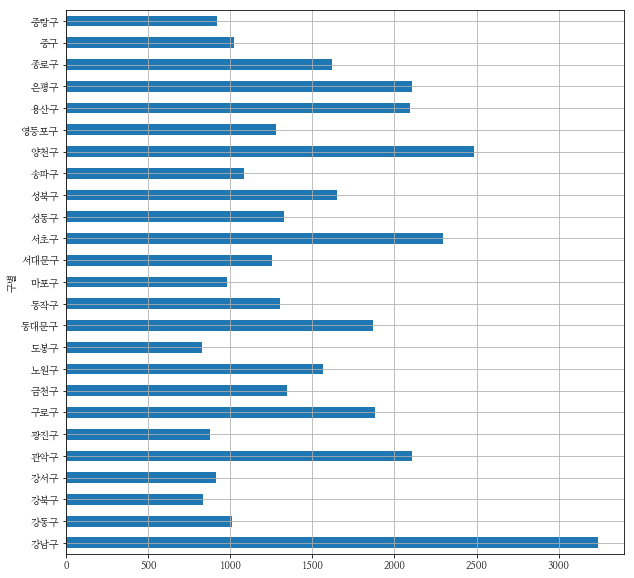

In [0]:
# kind=barh로 지정해서 수평바로 그리도록 함
# grid=True로 grid 그림

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

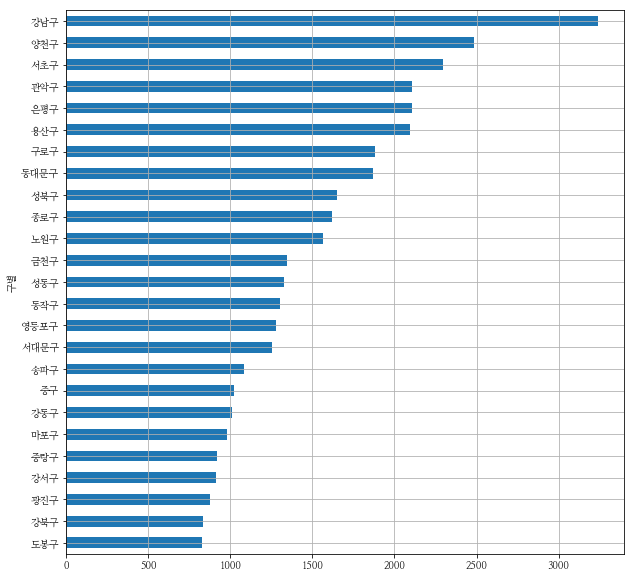

In [0]:
# CCTV 갯수로 정렬

data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()